In [181]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Est-ce qu'un ANN peur apprendre à dire si un eleve a son bac ou pas

### Création d'un dataset d'élèves, de notes et leur résultat au bac

In [145]:
# Je veux créer une matrice avec 4 lignes(dont chacune represente une matière) 
#et 200 colonnes pour les exemples d'éleves
n_matieres   = 4
n_eleves     = 200
note_maximal = 20
X = np.random.randint(note_maximal + 1, # pour retourner des nombres entre 0 et 20 (inclus)
                      size=(n_matieres,
                            n_eleves))
X.shape

(4, 200)

In [156]:
# A partir de notre dataset X, je crée mon label Y qui renvoie aux résultats des élèves 
#c'est à dire s'ils passent le bac ou pas

# Création d'un Bac fictif
coeffs = np.array([2, 4, 2, 6])
coeffs = coeffs.reshape(4, 1)

# On calcule le score en faisant la somme des notes * coeffs pour chaque élève
scores_bac = np.dot(X.T, coeffs)

moyennes = scores_bac/np.sum(coeffs)

#Pour avoir une matrice composée de 0(si l'éleve n'a pas le bac) et 1(s'il a le bac) 
Y = (moyennes>=10)*1


Y.shape

(200, 1)

## Architecture du RNN

In [157]:
def init_parametres(n_features_x,
                    n_neuron_l1,
                    n_neuron_l2,
                    n_neuron_last):

    W1 = np.random.randn(n_features_x, n_neuron_l1)*0.01
    b1 = np.zeros((1, n_neuron_l1))
    
    
    W2 = np.random.randn(n_neuron_l1, n_neuron_l2)*0.01
    b2 = np.zeros((1, n_neuron_l2))
    
    
    W3 = np.random.randn(n_neuron_l2, n_neuron_last)*0.01
    b3 = np.zeros((1, n_neuron_last ))
    
    #creation d'un dictionnaire pour stocker les résultats de mes parametres
    parametres = {"W1" : W1,
                 "W2" : W2,
                 "W3" : W3,
                 "b1" : b1,
                 "b2" : b2, 
                 "b3" : b3}

    return parametres

In [171]:
# Mon RNN aura 3 layers: 1 input layer(3), 1, hidden layer(3) et 1 output layer(1)
#JE crée la fonction initialisation des parametres


n_fx    = X.shape[0]
n_n1    = 3
n_n2    = 3
n_nlast = 1  # On prédit deux classes donc on a besoin que d'un neurone en sortie (classif binaire)

parametres = init_parametres(n_fx, n_n1, n_n2, n_nlast)

In [172]:
parametres

{'W1': array([[-0.00469995,  0.01419271, -0.00842324],
        [ 0.00311404, -0.003209  ,  0.0015512 ],
        [-0.0059534 , -0.00339539,  0.00345697],
        [ 0.0010456 ,  0.00141657,  0.00581509]]),
 'W2': array([[-0.00176928, -0.0029647 , -0.01454688],
        [ 0.00477738, -0.01416423,  0.00324922],
        [-0.00385413, -0.00172597, -0.00222993]]),
 'W3': array([[ 0.00718224],
        [ 0.01271985],
        [-0.00947209]]),
 'b1': array([[0., 0., 0.]]),
 'b2': array([[0., 0., 0.]]),
 'b3': array([[0.]])}

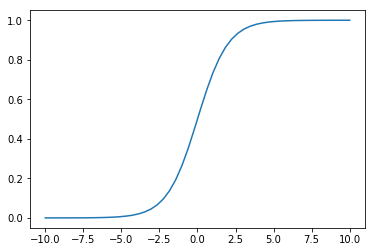

In [183]:
def sigmoid(z):
    S = 1/(1+ np.exp(-z))
    return S

ligne = np.linspace(-10,10)
plt.plot(ligne, sigmoid(ligne))

In [185]:
def forward_pass(X, parametres):
    cache = {}
    
    W1 = parametres["W1"] 
    W2 = parametres["W2"] 
    W3 = parametres["W3"] 
    b1 = parametres["b1"] 
    b2 = parametres["b1"] 
    b3 = parametres["b3"]
    
    
    Z1 = np.dot(X.T, W1)+ b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)+ b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3)+ b3
    A3 = sigmoid(Z3)
    
    cache["Z1"] =Z1
    cache["Z2"] =Z2
    cache["Z3"] =Z3
    cache["A1"] =A1
    cache["A2"] =A2
    cache["A3"] =A3

    
    return A3, cache

In [189]:
A3, cache = forward_pass(X, parametres)
cache

{'Z1': array([[-1.01721715e-01,  1.81376878e-01, -3.57693940e-02],
        [ 8.15382701e-03,  2.16103937e-02,  9.58730700e-02],
        [ 1.95656190e-02,  3.12113051e-02, -9.39462714e-03],
        [-5.95339893e-02, -6.04963261e-02,  1.92175383e-01],
        [-3.86819336e-02,  2.13152665e-01, -1.44151968e-02],
        [-6.66103745e-02, -8.04579384e-02,  1.30073255e-01],
        [-1.31968097e-01,  1.31592432e-01, -3.90056418e-02],
        [-1.55656107e-01,  2.20292513e-01, -1.58754142e-02],
        [-3.75922583e-02,  1.81125593e-01, -2.39520594e-04],
        [-1.05387819e-01,  1.31998100e-01,  3.17905039e-02],
        [ 3.88131888e-03,  1.33134225e-01, -1.81088135e-02],
        [-1.51793913e-01,  2.20854761e-01, -3.09625675e-02],
        [-8.63316581e-02,  2.88168994e-02,  7.64399851e-02],
        [-3.57757342e-02,  1.93772134e-01,  4.83129924e-03],
        [-9.43006375e-02,  1.39090825e-01,  2.54897182e-02],
        [-1.37490843e-01,  1.72536424e-01, -1.51586834e-02],
        [-1.669648